In [80]:
import pandas as pd 
#url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
url = 'titanic.csv'


# Lead the data
titanic_df = pd.read_csv(url)

#titanic_df.count()
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
#titanic_df.describe()
titanic_df.info()
#check missing values
titanic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
#fill the missing values
titanic_df['Age'].isnull().sum()
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
#check
titanic_df['Age'].isnull().sum()

C:\Users\dhana\AppData\Local\Temp\ipykernel_40080\623485461.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


np.int64(0)

In [83]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
#2. Lets analyse data
#titanic_df.describe()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
# Dropping columns of too  many missing values : cabin
# axis =1 column |, axis=0 row -, inplace = do it current df.
titanic_df.drop(columns=['Cabin'], inplace=True, axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [86]:
# Whats is survival rate by gender
titanic_df.groupby('Sex')['Survived'].mean() * 100


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [87]:
# Whats is survival rate by class
titanic_df.groupby('Pclass')['Survived'].mean() * 100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [88]:
# Whats is average age of survivors vs non-survivors
titanic_df.groupby('Survived')['Age'].mean()

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

In [89]:
#titanic_df[(titanic_df['Age']<16)].groupby('Survived')
# total age <16 = 83, survived = 49, %survided = 49/81 = 0.59 * 100 = 59%
titanic_df[(titanic_df['Age']<16)] ['Survived'] .mean() * 100

np.float64(59.036144578313255)

In [90]:
#youngest passenger survived
titanic_df[titanic_df['Survived'] ==1].sort_values(by='Age', ascending= True).head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C


In [91]:
# Create new column AgenGroup and apply label categorize - Child. Adult. Senior
bins = [0, 16, 60, float('inf')]
lables = ['Child', 'Adult', 'Senior']
#Create agegroup column
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=lables, right=False)
titanic_df[titanic_df['AgeGroup'] == 'Senior' ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S,Senior
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C,Senior
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,Senior
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,Senior
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S,Senior
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S,Senior
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S,Senior
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,Q,Senior
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,S,Senior
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,C,Senior


In [92]:
titanic_df.groupby('AgeGroup')['Survived'].mean() * 100

C:\Users\dhana\AppData\Local\Temp\ipykernel_40080\4292824062.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('AgeGroup')['Survived'].mean() * 100


AgeGroup
Child     59.036145
Adult     36.572890
Senior    26.923077
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Scatter : Age vs Fare')

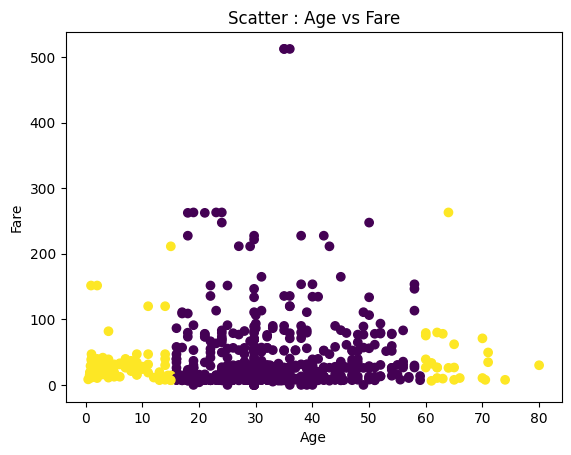

In [ ]:
from matplotlib import pyplot as plt

titanic_df['AgeGrpCatCode'] =  titanic_df['AgeGroup'].apply(lambda x : '0' if x =='Adult'  else  '1')
plt.scatter(titanic_df['Age'], titanic_df['Fare'] , c=titanic_df['AgeGrpCatCode'].astype('category').cat.codes )
#plt.scatter(titanic_df['Age'], titanic_df['Fare'] , c=titanic_df['AgeGroup'].astype('category').cat.codes )
plt.xlabel(xlabel='Age')
plt.ylabel(ylabel='Fare')
plt.title('Scatter : Age vs Fare')

